In [3]:
import zipfile
import os
import pandas as pd

# Ruta del archivo ZIP
zip_path = r"C:\Users\MAYRA ROCIO\Downloads\archive.zip"
extract_folder = r"C:\Users\MAYRA ROCIO\Downloads\archive"  # Carpeta donde extraeremos el archivo

# Verificar si el archivo ZIP existe
if os.path.exists(zip_path):
    # Extraer el archivo ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Archivo extraído en: {extract_folder}")

    # Ruta del archivo CSV extraído
    csv_path = os.path.join(extract_folder, "apple_stock.csv")

    # Verificar si el archivo CSV existe después de la extracción
    if os.path.exists(csv_path):
        print(f"Archivo encontrado: {csv_path}. Cargando datos...")
        df = pd.read_csv(csv_path)
        print("Datos cargados correctamente.")
        print(df.head())
    else:
        print(f"Error: No se encontró el archivo 'apple_stock.csv' en la ruta {csv_path}")
else:
    print(f"Error: El archivo ZIP no se encuentra en la ruta especificada: {zip_path}")


Archivo extraído en: C:\Users\MAYRA ROCIO\Downloads\archive
Archivo encontrado: C:\Users\MAYRA ROCIO\Downloads\archive\apple_stock.csv. Cargando datos...
Datos cargados correctamente.
   Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


1. #Explorar y comprender datos 

In [4]:
import pandas as pd

# Verificar que los datos se hayan cargado correctamente
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB
None
          Adj Close         Close          High           Low          Open  \
count  11107.000000  11107.000000  11107.000000  11107.000000  11107.000000   
mean      23.522229     24.357607     24.598169     24.092608     24.339076   
std       49.767881     50.217498     50.691902     49.682631     50.166818   
min        0.037815      0.049107      0.049665      0.049107      0.049665   
25%        0.243402      0.300290      0.306362      0.2924

#2. Visualización Básica de Datos
Para hacer que el análisis sea más atractivo, necesitamos visualizar los datos. Vamos a usar la librería matplotlib y seaborn para crear gráficos que representen tendencias clave, como la evolución del precio de las acciones de Apple a lo largo del tiempo.

            Adj Close     Close      High       Low      Open     Volume
Date                                                                    
1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


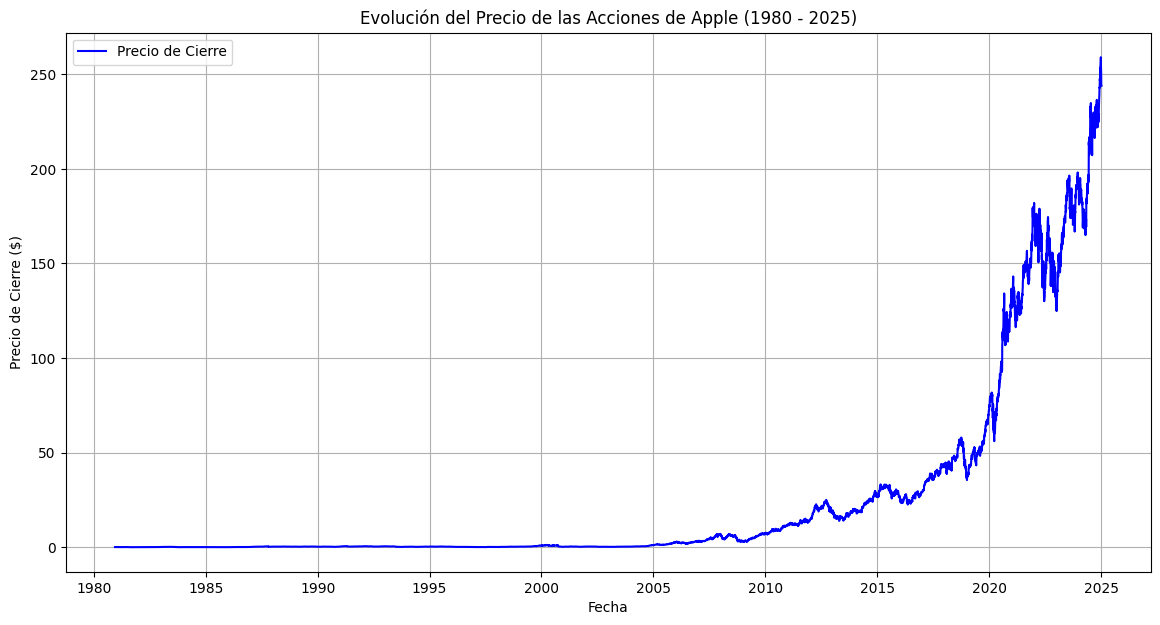

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv(r"C:\Users\MAYRA ROCIO\Downloads\archive\apple_stock.csv")

# Renombrar la columna 'Unnamed: 0' a 'Date'
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Asegurarnos de que la columna 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Verificar que todo está bien
print(df.head())

# Crear gráfico de la evolución del precio de cierre
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Precio de Cierre', color='blue')
plt.title("Evolución del Precio de las Acciones de Apple (1980 - 2025)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre ($)")
plt.legend()
plt.grid(True)
plt.show()



In [8]:
# Ver las primeras filas del DataFrame para inspeccionar los nombres de las columnas
print(df.head())


            Adj Close     Close      High       Low      Open     Volume
Date                                                                    
1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


3. Análisis de Tendencias y Patrones
Vamos a analizar algunas métricas clave:

Máximos y mínimos históricos.
Tendencia general en los precios.

In [9]:
# Precios máximos y mínimos históricos
max_price = df['Close'].max()
min_price = df['Close'].min()

# Ver los máximos y mínimos por año
df['Year'] = df.index.year
max_min_by_year = df.groupby('Year')['Close'].agg(['max', 'min'])

print(f"Máximo histórico: {max_price}")
print(f"Mínimo histórico: {min_price}")
print(max_min_by_year)


Máximo histórico: 259.0199890136719
Mínimo histórico: 0.0491070002317428
             max         min
Year                        
1980    0.160714    0.112723
1981    0.154018    0.063616
1982    0.151228    0.049107
1983    0.280134    0.079799
1984    0.148438    0.097656
1985    0.136719    0.064732
1986    0.195313    0.098772
1987    0.529018    0.182478
1988    0.421875    0.322545
1989    0.443080    0.301339
1990    0.422991    0.223214
1991    0.649554    0.367188
1992    0.623884    0.386161
1993    0.580357    0.202009
1994    0.386161    0.224330
1995    0.440848    0.284598
1996    0.312500    0.150670
1997    0.260603    0.115513
1998    0.383929    0.141741
1999    1.051897    0.287388
2000    1.287388    0.250000
2001    0.474821    0.265625
2002    0.466250    0.242679
2003    0.443214    0.234286
2004    1.222143    0.380000
2005    2.677857    1.130179
2006    3.278929    1.809643
2007    7.136786    2.973929
2008    6.961786    2.874643
2009    7.558571    2.792857

4. Análisis predictivo 

C:\Users\MAYRA ROCIO\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


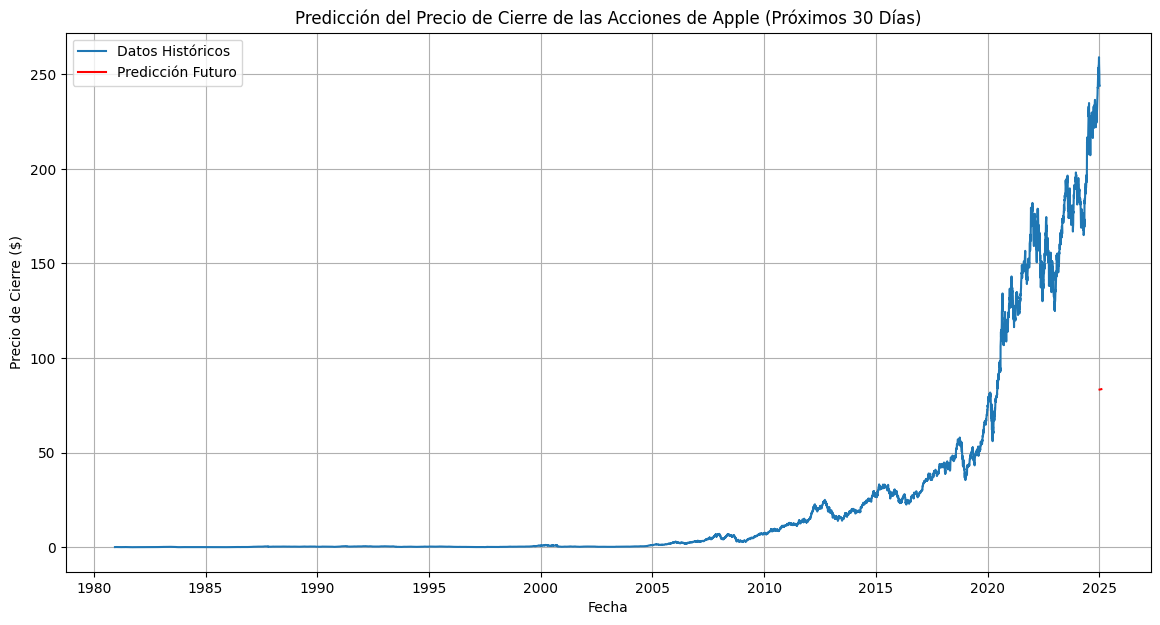

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear una columna para el número de días desde el inicio
df['Days'] = (df.index - df.index.min()).days

# Variables independientes (X) y dependientes (y)
X = df[['Days']]
y = df['Close']

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Predicción de precios futuros (por ejemplo, los próximos 30 días)
future_days = np.array([df['Days'].max() + i for i in range(1, 31)]).reshape(-1, 1)
predictions = model.predict(future_days)

# Graficar la predicción junto con los datos históricos
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Datos Históricos')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], predictions, label='Predicción Futuro', color='red')
plt.title("Predicción del Precio de Cierre de las Acciones de Apple (Próximos 30 Días)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre ($)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Calcular la volatilidad (desviación estándar de los precios de cierre)
volatility = df['Close'].pct_change().std() * np.sqrt(252)  # Anualizada
print(f"Volatilidad anualizada de Apple: {volatility}")


Volatilidad anualizada de Apple: 0.44108115928489305


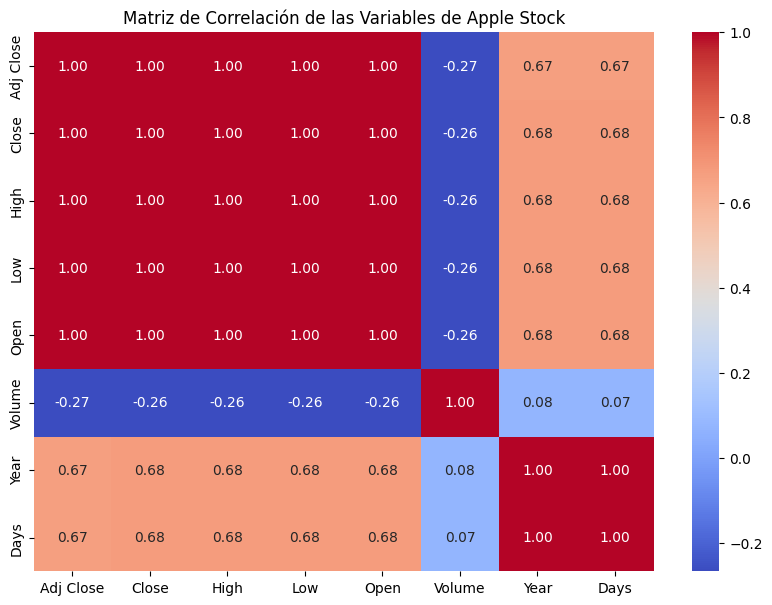

In [12]:
import seaborn as sns

# Calculando la matriz de correlación
corr = df.corr()

# Crear un heatmap de la correlación
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación de las Variables de Apple Stock")
plt.show()
